In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
data=pd.read_excel("dataset_assam120a.xlsx")
data


,YEAR,WATER LEVEL IN RIVER(M),DANGER LEVEL MARKING(M),MOISTURE IN SOIL(%),INTENSITY OF FLOOD
0,1900,50.08,49.53,90,MEDIUM
1,1901,60.31,60.49,82,LOW
2,1902,62.07,60.50,94,HIGH
3,1903,86.47,85.04,92,HIGH
4,1904,85.01,85.04,81,LOW
...,...,...,...,...,...
122,2021,85.74,85.04,90,MEDIUM
123,2022,62.32,60.50,90,HIGH
124,2023,144.98,143.00,90,HIGH
125,2024,87.35,85.04,100,EXTREME


In [31]:
data.isnull().sum()
data.duplicated().sum()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     127 non-null    int64  
 1   WATER LEVEL IN RIVER(M)  127 non-null    float64
 2   DANGER LEVEL MARKING(M)  127 non-null    float64
 3   MOISTURE IN SOIL(%)      127 non-null    int64  
 4   INTENSITY OF FLOOD       127 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 5.1+ KB


,YEAR,WATER LEVEL IN RIVER(M),DANGER LEVEL MARKING(M),MOISTURE IN SOIL(%)
count,127.000000,127.000000,127.000000,127.000000
mean,1962.401575,84.857717,83.743228,91.748031
std,36.388830,22.178290,22.017720,6.377003
min,1900.000000,49.710000,49.330000,80.000000
25%,1931.500000,79.345000,78.510000,87.000000
50%,1962.000000,81.380000,80.460000,91.000000
75%,1993.500000,105.085000,104.275000,98.000000
max,2025.000000,144.980000,143.000000,100.000000


In [4]:
# data=data.drop(index=6)
# data

<Axes: >

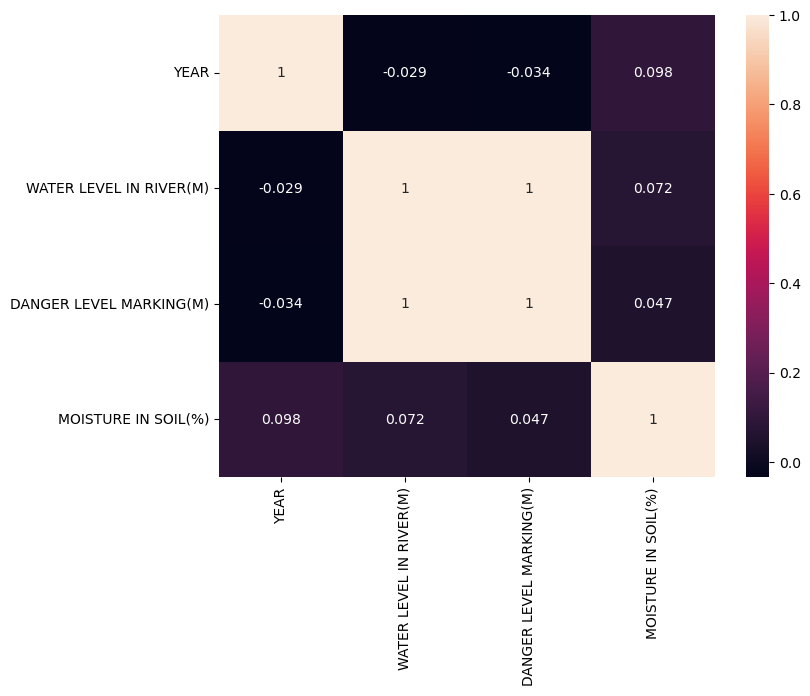

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True),annot=True)


In [33]:
data.value_counts()

YEAR  WATER LEVEL IN RIVER(M)  DANGER LEVEL MARKING(M)  MOISTURE IN SOIL(%)  INTENSITY OF FLOOD
1900  50.08                    49.53                    90                   MEDIUM                1
1979  49.88                    49.53                    90                   MEDIUM                1
1992  79.84                    79.22                    88                   MEDIUM                1
1991  106.44                   104.46                   100                  EXTREME               1
1990  79.52                    79.69                    80                   LOW                   1
                                                                                                  ..
1937  80.88                    79.44                    94                   MEDIUM                1
1936  106.74                   104.21                   100                  EXTREME               1
1935  79.91                    79.37                    85                   MEDIUM             

In [34]:
data_dict={
    "LOW":1,
    "MEDIUM":2,
    "HIGH":3,
    "EXTREME":4
}
data["INTENSITY OF FLOOD"]=data["INTENSITY OF FLOOD"].map(data_dict)
data


,YEAR,WATER LEVEL IN RIVER(M),DANGER LEVEL MARKING(M),MOISTURE IN SOIL(%),INTENSITY OF FLOOD
0,1900,50.08,49.53,90,2
1,1901,60.31,60.49,82,1
2,1902,62.07,60.50,94,3
3,1903,86.47,85.04,92,3
4,1904,85.01,85.04,81,1
...,...,...,...,...,...
122,2021,85.74,85.04,90,2
123,2022,62.32,60.50,90,3
124,2023,144.98,143.00,90,3
125,2024,87.35,85.04,100,4


In [35]:
x=data.drop("INTENSITY OF FLOOD",axis=1)
y=data["INTENSITY OF FLOOD"]
y


0      2
1      1
2      3
3      3
4      1
      ..
122    2
123    3
124    3
125    4
126    4
Name: INTENSITY OF FLOOD, Length: 127, dtype: int64

In [37]:
x

,YEAR,WATER LEVEL IN RIVER(M),DANGER LEVEL MARKING(M),MOISTURE IN SOIL(%)
0,1900,50.08,49.53,90
1,1901,60.31,60.49,82
2,1902,62.07,60.50,94
3,1903,86.47,85.04,92
4,1904,85.01,85.04,81
...,...,...,...,...
122,2021,85.74,85.04,90
123,2022,62.32,60.50,90
124,2023,144.98,143.00,90
125,2024,87.35,85.04,100


In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_columns=["YEAR","WATER LEVEL IN RIVER(M)","DANGER LEVEL MARKING(M)","MOISTURE IN SOIL(%)"]
x[x_columns]=scaler.fit_transform(x[x_columns])
x

,YEAR,WATER LEVEL IN RIVER(M),DANGER LEVEL MARKING(M),MOISTURE IN SOIL(%)
0,-1.721647,-1.574308,-1.560049,-0.275201
1,-1.694057,-1.111219,-1.060297,-1.534677
2,-1.666467,-1.031548,-1.059841,0.354538
3,-1.638877,0.072984,0.059130,0.039669
4,-1.611288,0.006894,0.059130,-1.692111
...,...,...,...,...
122,1.616719,0.039939,0.059130,-0.275201
123,1.644308,-1.020231,-1.059841,-0.275201
124,1.671898,2.721598,2.701981,-0.275201
125,1.699488,0.112820,0.059130,1.299145


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
x_train = mx.fit_transform(x_train)
x_test = mx.transform(x_test)

In [39]:
x_train


array([[ 0.13050977,  0.12067834,  0.07644232,  1.26129294],
       [ 0.15855549,  0.04984164,  0.06671155, -0.21237709],
       [-1.41200469,  0.94633987,  0.96472301, -0.04863597],
       [-0.57063316, -0.23626503, -0.24281975, -0.04863597],
       [-0.87913605, -1.57894248, -1.59122707, -0.86734154],
       [-0.99131892,  0.02960258,  0.05095696,  0.27884625],
       [-1.07545608,  2.7315167 ,  2.71116534,  0.93381071],
       [ 0.83165271, -0.22568552, -0.20621351, -0.53985932],
       [ 1.30842991, -0.25742405, -0.23911279, -0.21237709],
       [ 0.77556128, -0.24040484, -0.18443511, -1.84978823],
       [-1.32786753,  0.93852023,  0.97028346, -0.21237709],
       [ 0.35487551,  0.07238059,  0.06300459,  0.11510514],
       [-1.13154751, -1.59458175, -1.54581679, -1.19482377],
       [-0.43040458, -0.18796728, -0.22706517,  0.77006959],
       [ 0.0183269 , -1.58952198, -1.56249811, -1.35856488],
       [ 1.16820132, -1.53248464, -1.57500911,  1.42503405],
       [-0.90718177, -0.

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test=sc.transform(x_test)

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
y_pred1=model.predict(x_test)
y_pred1

array([4, 4, 3, 1, 4, 3, 2, 4, 4, 2, 1, 1, 3, 1, 4, 2, 3, 4, 4, 2, 3, 2,
       4, 2, 2, 4])

In [43]:
y_test


26     4
111    4
81     4
55     1
44     4
96     3
80     2
125    4
114    4
62     3
45     1
4      1
18     3
95     1
36     4
94     2
19     2
120    4
10     4
40     1
11     3
98     2
104    2
77     2
0      2
78     4
Name: INTENSITY OF FLOOD, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report

In [46]:
accuracy_score(y_test,y_pred1)

0.8076923076923077

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [48]:
model={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "GaussianNB":GaussianNB(),
    "SVC":SVC(),   
}


In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
for name,model in model.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    y_pred
    print(f"{name} have accuracy of",score)

LogisticRegression have accuracy of 0.8076923076923077
DecisionTreeClassifier have accuracy of 0.7692307692307693
RandomForestClassifier have accuracy of 0.8461538461538461
KNeighborsClassifier have accuracy of 0.7307692307692307
GaussianNB have accuracy of 0.8076923076923077
SVC have accuracy of 0.8461538461538461


In [51]:
SVC = RandomForestClassifier()
SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
accuracy_score(y_test,y_pred)

0.8461538461538461

In [ ]:

def recommendation(year, water_level, danger_level, moisture):
    features = np.array([[year, water_level, danger_level, moisture]])
    mx_features = mx.transform(features)
    sc_mx_features = sc.transform(mx_features)
    prediction = SVC.predict(sc_mx_features)
    reverse_data_dict = {1: "LOW", 2: "MEDIUM", 3: "HIGH", 4: "EXTREME"}
    
    return reverse_data_dict.get(prediction[0], "Unknown")
try:
    year = int(input("Enter year: "))
    water_level = float(input("Enter water level: "))
    danger_level = float(input("Enter danger water level: "))
    moisture = int(input("Enter moisture (0-100): "))

    result = recommendation(year, water_level, danger_level,
                            moisture)
    print(f"\nPredicted Flood Intensity: {result}")
except Exception as e:
    print(f"Error in input: {e}")